In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
import pylab as plt
from scipy import stats
#%pylab inline

In [4]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2016-08-30/"
#path = "/Users/marf 1/Desktop/PhD Temp/2016-07-25/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 4767
files_end = 4883


In [8]:
import os, os.path, fnmatch
all_csv_files = []
the_dir = "/Volumes/friebelm/PhD/NU Plasma/Measurements/"

for root, dirs, files in os.walk(the_dir):
    [all_csv_files.append(os.path.join(root, _file))\
        for _file in fnmatch.filter(files, '*.csv')]



In [9]:
all_csv_files

['/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Sn_meas_01.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_1.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_2.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_3.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_4.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_5.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_6.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_7.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_8.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Data_9.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Sn_meas_01 210814.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Sn_H9_L4_internal_corr_mean.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-08-21/Sn_H9_L4_internal_corr_all.csv',
 '/Volumes/friebelm/P

In [15]:
import re

all_csv_files_cycle1 = []
all_csv_files_cycle1_blk = []
all_csv_files_cycle2 = []
all_csv_files_cycle2_blk = []
for i in all_csv_files:
    sample = re.search(r""+"Data_"+"(.*).csv", i)
    if sample == None:
        None
    else:
        if open(i, 'r').read().find('Sn_L4_H8_2cycles_2.nrf') != -1:
            all_csv_files_cycle2.append(i)
        elif open(i, 'r').read().find('Sn_L4_H8_2cycles_2_blank.nrf') != -1:
            all_csv_files_cycle2_blk.append(i)
        elif open(i, 'r').read().find('Sn_L4_H9.nrf') != -1:
            all_csv_files_cycle1.append(i)
        elif open(i, 'r').read().find('Sn_L4_H9_blank.nrf') != -1:
            all_csv_files_cycle1_blk.append(i)
        else:
            None

In [17]:
all_csv_files_cycle1_blk
#for filex in all_csv_files_cycle1:
#    print re.search(r"(.*)"+"Data_", filex).group(1)

['/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_102.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_100.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_98.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_96.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_94.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_92.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_90.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_88.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-28/Data_86.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-29/Data_216.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-29/Data_214.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-29/Data_212.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-29/Data_210.csv',
 '/Volumes/friebelm/PhD/NU Plasma/Measurements/2014-11-29/

In [12]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles1
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111", "Te" : "125", "Xe" : "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles1_mass_range
# 122/118 norm
#isotopes = [["111", "112", "113", "114", "115", "116", "117", "119", "120", "122", "124", "126"]]
#isotope_column = ["111", "112", "113", "114", "115", "116", "117", "119", "120", "122", "124", "126"]
#data_sample_column = [(i + "/" + "118") for i in isotope_column]
#denom_isotope = "118"
#norm_ratio = ["122","118"]
# 116/120 norm
isotopes = [["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "126"]]
isotope_column = ["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "126"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]
denom_isotope = "120"
norm_ratio = ["116","120"]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = False

In [13]:
columns_1 = ["cycle", "sample", "date", "H9 (1)", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
sample_dict = {}
#files_1 = range(files_start, files_end, 1)
#for sample in files_1:
for filex in all_csv_files_cycle1:
    path = re.search(r"(.*)"+"Data_", filex).group(1)
    sample = re.search(r""+"Data_"+"(.*).csv", filex).group(1)
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    #df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    #df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    #df_zero_2 = df_zero_2[columns_2]
    #df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)
        sample_dict[sample] = path

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(4544)
df_all

,cycle,sample,H9 (1),H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),Ax (1),L1 (1),L2 (1),L3 (1),L4 (1)
date,,,,,,,,,,,,,,,,
2014-11-18 19:54:00,1,SPEX1 100ppb,0.000704,2.689791,2.101959,14.440731,3.758103,10.468027,3.274468,6.129480,0.140714,0.272275,0.000772,0.390892,0.000804,0.000673
2014-11-18 19:54:00,2,SPEX1 100ppb,0.000687,2.708072,2.115927,14.535786,3.782941,10.536428,3.295689,6.168973,0.141634,0.273691,0.000620,0.393034,0.000652,0.000544
2014-11-18 19:54:00,3,SPEX1 100ppb,0.000654,2.759720,2.156241,14.812801,3.854881,10.736920,3.358530,6.286137,0.144324,0.278842,0.000645,0.400402,0.000656,0.000554
2014-11-18 19:54:00,4,SPEX1 100ppb,0.000660,2.760966,2.157144,14.818832,3.856329,10.741203,3.359983,6.298555,0.144357,0.280136,0.000943,0.401808,0.000960,0.000809
2014-11-18 19:54:00,5,SPEX1 100ppb,0.000621,2.756538,2.153898,14.796656,3.850727,10.725636,3.355043,6.279745,0.144140,0.278986,0.000680,0.400403,0.000682,0.000580
2014-11-18 19:54:00,6,SPEX1 100ppb,0.000688,2.745761,2.145468,14.737838,3.835528,10.682824,3.341543,6.254753,0.143631,0.277441,0.000619,0.398536,0.000651,0.000524
2014-11-18 19:54:00,7,SPEX1 100ppb,0.000658,2.741622,2.142112,14.714227,3.828944,10.665067,3.335808,6.243650,0.143328,0.277123,0.000651,0.397862,0.000631,0.000551
2014-11-18 19:54:00,8,SPEX1 100ppb,0.000667,2.754115,2.151841,14.780553,3.851810,10.713141,3.350930,6.280724,0.143970,0.278428,0.000660,0.399698,0.000734,0.000538
2014-11-18 19:54:00,9,SPEX1 100ppb,0.000638,2.745520,2.141150,14.708015,3.827353,10.660697,3.334617,6.240933,0.143563,0.276880,0.000625,0.397585,0.000641,0.000562


In [14]:
blk_ls

['102',
 '100',
 '98',
 '96',
 '94',
 '92',
 '90',
 '88',
 '86',
 '216',
 '214',
 '212',
 '210',
 '208',
 '206',
 '204',
 '202',
 '200',
 '198',
 '196',
 '194',
 '192',
 '190',
 '188',
 '186',
 '184',
 '182',
 '180',
 '178',
 '176',
 '174',
 '172',
 '170',
 '168',
 '166',
 '164',
 '162',
 '160',
 '158',
 '156',
 '154',
 '152',
 '150',
 '148',
 '146',
 '144',
 '142',
 '140',
 '138',
 '136',
 '134',
 '132',
 '130',
 '128',
 '126',
 '124',
 '122',
 '120',
 '118',
 '116',
 '114',
 '112',
 '110',
 '108',
 '106',
 '104',
 '382',
 '380',
 '378',
 '376',
 '374',
 '372',
 '370',
 '368',
 '366',
 '364',
 '362',
 '360',
 '358',
 '356',
 '354',
 '352',
 '350',
 '348',
 '346',
 '344',
 '342',
 '340',
 '338',
 '336',
 '334',
 '332',
 '330',
 '328',
 '326',
 '324',
 '322',
 '320',
 '318',
 '316',
 '314',
 '312',
 '310',
 '308',
 '306',
 '304',
 '302',
 '300',
 '298',
 '296',
 '294',
 '292',
 '290',
 '288',
 '286',
 '284',
 '282',
 '280',
 '278',
 '276',
 '274',
 '272',
 '270',
 '268',
 '266',
 '264',

In [13]:
#files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_dict:
    path = sample_dict[sample]
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    #blk1 = [item for item in blk_ls if item < sample]
    #blk2 = [item for item in blk_ls if item > sample]
    #blk1 = blk1[-1]
    #blk2 = blk2[0]
    #blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_1 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        #df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        #df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_1 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

nu_data_reduction.py:576: RuntimeWarning: invalid value encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
nu_data_reduction.py:578: RuntimeWarning: invalid value encountered in greater
  return modified_z_score > thresh
nu_data_reduction.py:576: RuntimeWarning: divide by zero encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation


Iterative Beta Correction Failed! --> beta_temp before iteration used


In [14]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)
df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.952)/(df_internal_norm["118"]/24.223)
df_internal_sub = df_internal_sub[df_internal_sub["118"] >= 0.2]
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [34]:
#df_internal_sub = df_internal_sub.drop(["2014-12-07 10:04:00"])


date
2014-11-30 09:58:00                  SPEX 200ppb
2014-11-30 09:42:00                  SPEX 100ppb
2014-11-30 09:27:00                   SPEX 50ppb
2014-11-29 23:05:00                  NIST 100ppb
2014-11-29 22:49:00                  NIST 100ppb
2014-11-29 23:37:00                  SPEX 100ppb
2014-11-29 23:20:00                  NIST 100ppb
2014-11-29 23:53:00                  SPEX 100ppb
2014-11-30 03:43:00                   SPEX 10ppb
2014-12-06 18:37:00                  NIST 100ppb
2014-12-07 05:10:00    SPEX 105ppb + 0.004ppb Cd
2014-12-07 05:25:00    SPEX 101ppb + 2.02ppb Cd 
2014-12-07 04:39:00                  SPEX 100ppb
2014-12-07 04:54:00     SPEX 100ppb + 0.35ppb In
2014-12-06 17:35:00                  NIST 100ppb
2014-12-06 17:51:00                  NIST 100ppb
2014-12-06 18:06:00                  NIST 100ppb
2014-12-07 05:41:00    SPEX 97.3ppb + 1.91ppb Te
2014-12-06 18:22:00                  NIST 100ppb
2014-12-06 15:01:00                  SPEX 100ppb
2014-11-29 21:3

In [35]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
df_internal_norm_mean
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,111/118,112/118,113/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,...,117,118,119,120,122,124,126,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2014-11-18 18:22:00,0.000095,0.040146,-7.417749e-07,0.027181,0.013944,0.600272,0.316710,0.354617,1.346058,0.19125,...,3.724086,11.898184,4.269082,16.393708,2.383481,3.046698,0.001283,0.000167,0.000138,NIST 100ppb
2014-11-18 18:27:00,0.000094,0.040136,-1.322015e-06,0.027185,0.013945,0.600282,0.316710,0.354608,1.346055,0.19125,...,3.706574,11.843534,4.249874,16.321915,2.373533,3.034511,0.001068,0.000164,0.000115,NIST 100ppb
2014-11-18 18:31:00,0.000086,0.040145,-1.115092e-06,0.027188,0.013944,0.600269,0.316711,0.354612,1.346058,0.19125,...,3.555948,11.363439,4.077897,15.662536,2.277955,2.912797,0.000996,0.000149,0.000112,NIST 100ppb
2014-11-18 18:36:00,0.000085,0.040139,-1.335591e-06,0.027179,0.013946,0.600278,0.316714,0.354610,1.346058,0.19125,...,3.606914,11.526283,4.136492,15.888379,2.310993,2.955214,0.000956,0.000149,0.000106,NIST 100ppb
2014-11-18 18:40:00,0.000098,0.040132,-9.876539e-07,0.027173,0.013945,0.600279,0.316713,0.354610,1.346049,0.19125,...,3.635452,11.618228,4.169738,16.016894,2.329985,2.979983,0.001027,0.000170,0.000113,NIST 100ppb
2014-11-18 18:44:00,0.000085,0.040143,-3.970975e-07,0.027176,0.013946,0.600275,0.316710,0.354612,1.346068,0.19125,...,3.522353,11.258679,4.040818,15.522137,2.258069,2.888050,0.000901,0.000148,0.000102,NIST 100ppb
2014-11-18 18:48:00,0.000080,0.040136,-1.452849e-06,0.027177,0.013947,0.600272,0.316712,0.354617,1.346075,0.19125,...,3.582844,11.450509,4.109768,15.786363,2.296529,2.937354,0.000861,0.000139,0.000096,NIST 100ppb
2014-11-18 18:52:00,0.000085,0.040143,-1.560131e-06,0.027177,0.013946,0.600276,0.316713,0.354609,1.346054,0.19125,...,3.618107,11.563589,4.150123,15.943753,2.319473,2.967036,0.000858,0.000148,0.000095,NIST 100ppb
2014-11-18 18:57:00,0.000088,0.040143,3.068377e-07,0.027187,0.013946,0.600280,0.316714,0.354608,1.346049,0.19125,...,3.490723,11.156188,4.004608,15.384368,2.238444,2.863409,0.000808,0.000157,0.000093,NIST 100ppb


In [36]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

111/118                 112/118            \
                               mean           SD2      mean       SD2   
sample                                                                  
NIST 100ppb                0.000047  5.161482e-05  0.040139  0.000008   
NIST 50ppb                 0.000163  1.007964e-05  0.040136  0.000018   
SPEX 100ppb                0.000045  1.603544e-04  0.040132  0.000032   
SPEX 100ppb + 0.35ppb In   0.000192  1.753017e-06  0.040131  0.000003   
SPEX 101ppb + 2.02ppb Cd   0.008536  5.406749e-06  0.040248  0.000003   
SPEX 105ppb + 0.004ppb Cd  0.000030  2.211748e-06  0.040128  0.000002   
SPEX 10ppb                 0.000427  4.392584e-05  0.040012  0.000088   
SPEX 200ppb                0.000013  5.012881e-07  0.040141  0.000001   
SPEX 20ppb                 0.000189  1.021397e-05  0.040105  0.000019   
SPEX 50ppb                 0.000069  3.348294e-06  0.040126  0.000009   
SPEX 97.3ppb + 1.91ppb Te  0.000032  4.336152e-06  0.040127  0.000007   
SPEX1 100ppb               0.000070  0.000000e+00  0.040137  0.000000   
SPEX1 20ppb                0.000402  1.822083e-05  0.040109  0.000008   

                                113/118                 114/118            \
                                   mean           SD2      mean       SD2   
sample                                                                      
NIST 100ppb               -1.393799e-06  2.585486e-06  0.027174  0.000012   
NIST 50ppb                 2.408390e-07  3.630445e-07  0.027154  0.000004   
SPEX 100ppb               -1.374264e-06  3.648680e-06  0.027165  0.000046   
SPEX 100ppb + 0.35ppb In   7.697122e-07  1.691623e-06  0.027172  0.000003   
SPEX 101ppb + 2.02ppb Cd   1.278338e-04  2.972209e-06  0.027609  0.000004   
SPEX 105ppb + 0.004ppb Cd  6.589679e-04  2.213276e-06  0.027164  0.000004   
SPEX 10ppb                -2.653296e-05  4.087944e-05  0.027006  0.000104   
SPEX 200ppb               -7.910484e-07  4.977085e-07  0.027177  0.000002   
SPEX 20ppb                -6.535585e-06  1.499173e-05  0.027126  0.000043   
SPEX 50ppb                -2.574265e-06  9.428763e-06  0.027156  0.000011   
SPEX 97.3ppb + 1.91ppb Te -2.692622e-06  2.988232e-06  0.027162  0.000010   
SPEX1 100ppb              -1.754373e-06  0.000000e+00  0.027175  0.000000   
SPEX1 20ppb               -8.295012e-06  5.919397e-06  0.027118  0.000016   

                            115/118              ...          122            \
                               mean       SD2    ...         mean       SD2   
sample                                           ...                          
NIST 100ppb                0.013946  0.000004    ...     1.914159  0.489868   
NIST 50ppb                 0.013959  0.000001    ...     1.084817  0.003089   
SPEX 100ppb                0.013959  0.000012    ...     1.635778  0.500008   
SPEX 100ppb + 0.35ppb In   0.013959  0.000004    ...     1.743467  0.087145   
SPEX 101ppb + 2.02ppb Cd   0.013962  0.000005    ...     1.690439  0.056829   
SPEX 105ppb + 0.004ppb Cd  0.028797  0.000012    ...     1.689586  0.096115   
SPEX 10ppb                 0.013998  0.000032    ...     0.128172  0.002265   
SPEX 200ppb                0.013956  0.000001    ...     3.663046  0.093437   
SPEX 20ppb                 0.013973  0.000018    ...     0.279731  0.009126   
SPEX 50ppb                 0.013963  0.000006    ...     0.776543  0.016410   
SPEX 97.3ppb + 1.91ppb Te  0.013962  0.000002    ...     1.629345  0.042146   
SPEX1 100ppb               0.013956  0.000000    ...     2.162561  0.000000   
SPEX1 20ppb                0.013966  0.000009    ...     0.409028  0.010785   

                                124                 126               Cd/Sn  \
                               mean       SD2      mean       SD2      mean   
sample                                                                        
NIST 100ppb                2.450842  0.622869  0.000504  0.000584  0.000081   
NIST 50ppb                 1.388067  0.003849

In [56]:
df_internal_norm_mean.describe()


,111/118,112/118,113/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,...,116,117,118,119,120,122,124,126,Cd/Sn,Te/Sn
count,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.000434,0.040132,3.017158e-05,0.027177,0.014576,0.600298,0.316713,0.354610,1.346066,1.912496e-01,...,4.745849,2.535750,8.110452,2.913166,11.199200,1.632142,2.090978,0.003472,0.000753,0.000590
std,0.001700,0.000037,1.344293e-04,0.000098,0.002978,0.000044,0.000006,0.000011,0.000105,2.989150e-16,...,1.998933,1.068306,3.416765,1.227160,4.717407,0.687252,0.880233,0.014990,0.002947,0.002376
min,0.000013,0.039948,-5.563205e-05,0.026949,0.013941,0.600174,0.316688,0.354557,1.345978,1.912496e-01,...,0.366946,0.196096,0.627414,0.225399,0.866914,0.126366,0.161987,0.000175,0.000022,0.000017
25%,0.000030,0.040130,-2.439418e-06,0.027164,0.013948,0.600283,0.316710,0.354601,1.346023,1.912496e-01,...,4.698466,2.511901,8.034662,2.886412,11.096855,1.619523,2.077698,0.000262,0.000052,0.000037
50%,0.000032,0.040134,-1.143448e-06,0.027170,0.013957,0.600293,0.316713,0.354610,1.346038,1.912496e-01,...,4.963127,2.650470,8.478462,3.045722,11.711200,1.706818,2.187114,0.000294,0.000055,0.000048
75%,0.000086,0.040139,2.949299e-08,0.027173,0.013961,0.600301,0.316717,0.354619,1.346053,1.912496e-01,...,5.141233,2.748353,8.791874,3.158228,12.141019,1.768865,2.265643,0.000367,0.000149,0.000095
max,0.008539,0.040250,6.599913e-04,0.027612,0.028806,0.600491,0.316734,0.354630,1.346503,1.912496e-01,...,10.812061,5.780762,18.494954,6.644861,25.552500,3.725013,4.774185,0.076547,0.014807,0.011941


/Users/matthias/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()


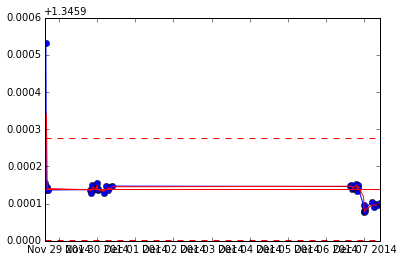

In [37]:
# variation of standard data + mean + 2SD
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "SPEX 100ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

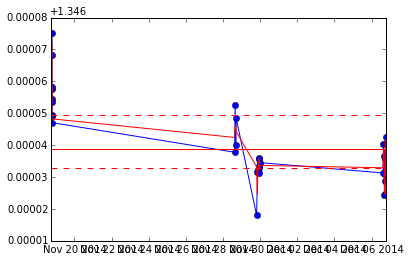

In [53]:
# variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].median(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].quantile(0.25), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].quantile(0.75), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

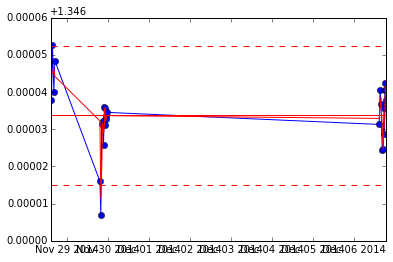

In [42]:
# outlier corr variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = new_corr.mad_outlier_rejection(plot_Nist.drop("sample", axis=1))
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [57]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 200ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
corr_values_2 = corr_values[corr_values["sample"] == "NIST 200ppb"]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
sample_2 = corr_values_2["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]
new_2 = corr_values_2[corr_values_2.columns[corr_values_2.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new_2 / ((new_2.shift(1) + new_2.shift(-1))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
epsilon_NIST= epsilon_NIST[epsilon_NIST["sample"] != "NIST 200ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 200ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=False)
#epsilon_comp.index = epsilon_comp["Date"]
#epsilon_comp.columns
epsilon_comp

,111/118,112/118,113/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,...,117,118,119,120,122,124,126,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2014-11-28 15:22:00,372.113905,-0.435031,-1436.178431,-0.467816,9.509546,0.059480,-0.107673,-0.030081,0.076218,2.220446e-12,...,-263.076083,-261.787554,-260.634836,-259.597889,-257.358111,-255.310855,258.534651,317.425283,534.849310,SPEX 100ppb
2014-11-28 16:44:00,795.099955,-0.314580,-1533.943767,-1.305482,6.520825,0.043112,-0.187530,-0.085497,0.000329,2.220446e-12,...,-454.578415,-453.554644,-452.750779,-451.883493,-450.223371,-448.224175,259.247846,837.861830,747.499365,SPEX 100ppb
2014-11-28 17:15:00,1193.869580,-0.268107,-10710.061916,1.265769,7.792272,0.119037,-0.154876,0.038513,0.024757,2.220446e-12,...,-191.506626,-191.025774,-190.625812,-190.394408,-190.451187,-189.403454,-2659.213905,1192.013354,-2530.252590,SPEX 100ppb
2014-11-29 20:43:00,682.022557,-0.872524,69168.579125,-0.862074,6.689152,0.141464,-0.057522,0.239966,0.142841,2.220446e-12,...,-544.830459,-543.662640,-542.882654,-541.734010,-540.116114,-537.668528,465.487715,582.413091,1063.598544,SPEX 100ppb
2014-12-06 15:01:00,-54.656694,-0.219104,-8885.153521,1.456748,8.406446,-0.037200,-0.060126,0.149021,0.075651,-1.110223e-12,...,-311.090770,-309.971933,-308.767050,-307.785221,-305.759628,-303.081268,621.666654,-13.750851,942.198291,NaN
2014-12-06 15:32:00,364.069230,0.104072,-16671.101028,1.338610,5.243637,-0.027385,0.042577,-0.065653,0.079692,0.000000e+00,...,-499.993156,-499.189012,-497.394992,-496.471808,-494.169913,-492.992419,-373.402109,459.063070,129.190460,SPEX 100ppb
2014-12-06 16:18:00,653.579177,-1.309396,-6090.556570,-1.520760,5.300332,0.061213,-0.160483,-0.052322,0.066019,-1.110223e-12,...,-478.758413,-477.787881,-476.305963,-475.765608,-473.730522,-471.217166,-602.801027,645.103251,-131.217832,SPEX 100ppb
2014-12-06 16:49:00,402.321923,-0.546365,10518.528200,-0.662486,8.709095,0.007651,-0.126390,0.232972,0.130323,4.440892e-12,...,-420.222905,-420.295702,-418.870668,-418.179578,-417.734372,-415.937604,59.537065,481.321577,502.758705,SPEX 100ppb
2014-12-06 17:20:00,1193.792742,-1.353772,91243.863533,-2.525559,4.940124,-0.255147,-0.141080,0.128026,0.111348,0.000000e+00,...,-491.413863,-491.012894,-490.547051,-489.595534,-488.978343,-487.348521,-144.387485,1189.315731,357.502955,SPEX 100ppb


In [59]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "126", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

111/118          112/118         113/118           114/118        \
               mean      SD2    mean   SD2      mean       SD2    mean   SD2   
sample                                                                         
NIST 100ppb    1.59  2098.39   -0.05  2.42  -2482.22  74425.16    0.03  3.12   
SPEX 100ppb  707.11   635.54   -0.62  0.96  16811.14  75477.15   -0.59  2.49   

            115/118         ...    120/118       122/118     124/118        \
               mean   SD2   ...       mean   SD2    mean SD2    mean   SD2   
sample                      ...                                              
NIST 100ppb    0.04  2.68   ...      -0.00  0.13       0   0   -0.01  0.38   
SPEX 100ppb    6.84  3.18   ...       0.08  0.09       0   0   -0.01  0.26   

            126/118              113           
               mean      SD2    mean      SD2  
sample                                         
NIST 100ppb  -11.35  2500.12  -43.23  2154.19  
SPEX 100ppb   72.38  2095.14  467.21  1776.27  

[2 rows x 26 columns]

In [130]:
epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"]["118/120"].mean()

-0.0016634003179120487

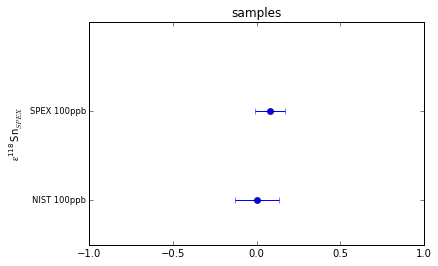

In [60]:
sel_ratio = "118/120"
x = range(1, len(epsilon_sum.index)+1)
plt.errorbar(epsilon_sum[sel_ratio]["mean"], x, xerr = epsilon_sum[sel_ratio]["SD2"], ls='none', marker="o")
plt.title("samples")
plt.xlim([-1, 1])
plt.ylim([0.5, 3.0])
plt.yticks(x, epsilon_sum.index, size='small', rotation=0)
plt.axvline(epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].mean(), color='k', linestyle='-')
plt.axvline(epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].mean()+ 2*epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].std(), color='r', linestyle='--')
plt.axvline(epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].mean()- 2*epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].std(), color='r', linestyle='--')
#plt.axvline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.ylabel(r'$\mathregular{\epsilon^{118}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

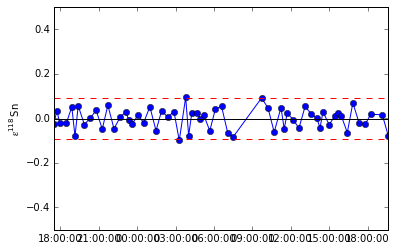

In [133]:
sel_ratio = "118/120"
epsilon_comp = epsilon_comp[epsilon_comp["sample"] == "NIST 200ppb"]
x = epsilon_comp.index
plt.plot(x, epsilon_comp[sel_ratio], marker="o")
plt.ylim([-0.5, 0.5])
#plt.xticks(x, epsilon_comp["sample"], size='small', rotation=90)
plt.axhline(epsilon_comp[sel_ratio].mean(), color='k', linestyle='-')
plt.axhline(epsilon_comp[sel_ratio].mean()+ 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(epsilon_comp[sel_ratio].mean()- 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [38]:
df_all.to_csv(path_sav + "Sn_H9_L4_1_cycles_NU_Signals_zero_corr.csv", mode='w', header=True)

In [39]:
df_internal_norm.to_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_122_118_no_bdg_corr_all.csv", mode='w', header=True)

In [40]:
df_internal_norm_mean_sd.to_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_122_118_no_bdg_corr.csv", mode='w', header=True)

In [103]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

NameError: name 'df_std' is not defined

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [30]:
#old Cd/Sn & Te/Sn extraction - doesn't include bgd corr
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
